# Loading libraries

In [ ]:
import glob2 as glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import pandas as pd
pd.option_context("display.max_columns", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading file

In [ ]:
path= '/content/drive/MyDrive/Research/IBM Advanced Data Science/'

final_clean = pd.read_csv(path + 'final_clean_test.csv')
final_clean.head()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study
0,2021-08-17 06:39:40.000,study,1,1.0,-78.725790,-83.191926,-75.369287,-54.308417
1,2021-08-17 06:39:40.500,study,1,2.0,-78.578759,-83.049066,-75.466165,-54.412302
2,2021-08-17 06:39:45.000,study,1,3.0,-78.440888,-82.904410,-75.560229,-54.525104
3,2021-08-17 06:39:45.500,study,1,4.0,-78.311176,-82.758078,-75.652041,-54.644338
4,2021-08-17 06:39:46.000,study,1,5.0,-78.188794,-82.610661,-75.743061,-54.768104


# Converting categories for target

In [ ]:
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(final_clean['user_at'].unique())
final_clean['user_at_cat'] = le.transform(final_clean['user_at'])
final_clean.head()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study,user_at_cat
0,2021-08-17 06:39:40.000,study,1,1.0,-78.725790,-83.191926,-75.369287,-54.308417,5
1,2021-08-17 06:39:40.500,study,1,2.0,-78.578759,-83.049066,-75.466165,-54.412302,5
2,2021-08-17 06:39:45.000,study,1,3.0,-78.440888,-82.904410,-75.560229,-54.525104,5
3,2021-08-17 06:39:45.500,study,1,4.0,-78.311176,-82.758078,-75.652041,-54.644338,5
4,2021-08-17 06:39:46.000,study,1,5.0,-78.188794,-82.610661,-75.743061,-54.768104,5


# Scaling features

In [ ]:
from sklearn import preprocessing
scale_columns = ['kitchen', 'living', 'main', 'study']

scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(final_clean[scale_columns])
X_train

array([[-3.71425939e-01, -3.37035307e-01,  3.39704020e-02,
         3.34508288e-01],
       [-3.51025984e-01, -3.23811532e-01,  1.69866271e-02,
         3.28261286e-01],
       [-3.31896955e-01, -3.10421517e-01,  4.96307935e-04,
         3.21478098e-01],
       ...,
       [-2.49545804e-01,  1.61941062e+00,  1.93513206e-01,
        -1.07804336e+00],
       [-2.82585888e-01,  1.63299564e+00,  1.96145911e-01,
        -1.07409595e+00],
       [-3.16138837e-01,  1.64692945e+00,  1.98298646e-01,
        -1.07045461e+00]])

In [ ]:
X_train.shape

(2659, 4)

In [ ]:
y_train = to_categorical(final_clean['user_at_cat'])

In [ ]:
y_train.shape

(2659, 6)

# Preparing testing data

In [ ]:
# List of files
mainPath = "/content/drive/MyDrive/Research"

files = glob.glob(mainPath + '/beacons_home/**/*.csv', recursive = True)

# Ground truth: training dataset
files_train = [file for file in files if 'Tests' in file]

# Files for testing
files_test = list(set(files) - set(files_train))

In [ ]:
# Check dataframe structure
def extract_info_file(filename, cont):
  lastPart = filename.split(' ')[-1]
  lastPart = lastPart.replace(".csv", "")
  area = lastPart.split('_')[0]
  df = pd.read_csv(filename)
  df['user_at'] = area
  df['file_id'] = cont
  return(df)

In [ ]:
X_testDF_or = pd.DataFrame()
cont = 1

for file in files_test:
  tmpDF = extract_info_file(file, cont)
  X_testDF_or = X_testDF_or.append(tmpDF, ignore_index=True)
  cont += 1

In [ ]:
fixing = {'80:EC:CA:CD:2F:84': 'main',
          '80:EC:CA:CD:2F:42': 'kitchen',
          'D9:C7:16:15:A3:0F': 'living',
          'C2:65:7C:E2:D6:6B': 'study'}

X_testDF_or['beacon_at'] = X_testDF_or['MAC Address'].replace(fixing)
X_testDF_or.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at
0,1,16-08-2021 13:27:10:601,-,70:F4:0E:96:0C:0D,-67,0a4c001005231877ae4a,-,-,p03,1,70:F4:0E:96:0C:0D
1,2,16-08-2021 13:27:10:620,BrtBeacon402,D9:C7:16:15:A3:0F,-74,-,21,170.1 Deg C,p03,1,living
2,3,16-08-2021 13:27:10:650,-,6C:68:72:AC:34:86,-92,1d12d000200011059662bc7966a47b6ab69c65859284de...,-,-,p03,1,6C:68:72:AC:34:86
3,4,16-08-2021 13:27:10:657,-,68:85:9F:25:14:0A,-83,1e0600010920025b1e2ce9b91fa0430f672b8bd95bcf0a...,-,-,p03,1,68:85:9F:25:14:0A
4,5,16-08-2021 13:27:10:678,BrtBeacon402,C2:65:7C:E2:D6:6B,-72,-,21,170.1 Deg C,p03,1,study


In [ ]:
X_testDF_or.shape

(37266, 11)

In [ ]:
# beacons placed
macAddresses = ['80:EC:CA:CD:2F:42', '80:EC:CA:CD:2F:84', 'C2:65:7C:E2:D6:6B', 'D9:C7:16:15:A3:0F']

In [ ]:
X_test_pre = X_testDF_or[X_testDF_or['MAC Address'].isin(macAddresses)]
X_test_pre = X_test_pre.reset_index(drop=True)
X_test_pre.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at
0,2,16-08-2021 13:27:10:620,BrtBeacon402,D9:C7:16:15:A3:0F,-74,-,21,170.1 Deg C,p03,1,living
1,5,16-08-2021 13:27:10:678,BrtBeacon402,C2:65:7C:E2:D6:6B,-72,-,21,170.1 Deg C,p03,1,study
2,7,16-08-2021 13:27:10:723,BrtBeacon402,D9:C7:16:15:A3:0F,-73,-,21,170.1 Deg C,p03,1,living
3,9,16-08-2021 13:27:10:773,BMPkitchen,80:EC:CA:CD:2F:42,-55,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,p03,1,kitchen
4,10,16-08-2021 13:27:10:787,BrtBeacon402,C2:65:7C:E2:D6:6B,-72,-,21,170.1 Deg C,p03,1,study


In [ ]:
X_test_pre.shape

(19720, 11)

In [ ]:
X_test_pre.shape

(19720, 11)

In [ ]:
X_test_pre['Timestamp'] = pd.to_datetime(X_test_pre['Timestamp'], format = '%d-%m-%Y %H:%M:%S:%f')
X_test_pre['Timestamp2'] = X_test_pre['Timestamp'].dt.round('500ms')
X_test_pre.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at,Timestamp2
0,2,2021-08-16 13:27:10.620,BrtBeacon402,D9:C7:16:15:A3:0F,-74,-,21,170.1 Deg C,p03,1,living,2021-08-16 13:27:10.500
1,5,2021-08-16 13:27:10.678,BrtBeacon402,C2:65:7C:E2:D6:6B,-72,-,21,170.1 Deg C,p03,1,study,2021-08-16 13:27:10.500
2,7,2021-08-16 13:27:10.723,BrtBeacon402,D9:C7:16:15:A3:0F,-73,-,21,170.1 Deg C,p03,1,living,2021-08-16 13:27:10.500
3,9,2021-08-16 13:27:10.773,BMPkitchen,80:EC:CA:CD:2F:42,-55,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,p03,1,kitchen,2021-08-16 13:27:11.000
4,10,2021-08-16 13:27:10.787,BrtBeacon402,C2:65:7C:E2:D6:6B,-72,-,21,170.1 Deg C,p03,1,study,2021-08-16 13:27:11.000


In [ ]:
# Fixing RSSI from living and study rooms because of their placement (height)
X_test_pre.loc[X_test_pre['MAC Address'].isin(['D9:C7:16:15:A3:0F', 'C2:65:7C:E2:D6:6B']), 'RSSI'] = X_test_pre.loc[X_test_pre['MAC Address'].isin(['D9:C7:16:15:A3:0F', 'C2:65:7C:E2:D6:6B']), 'RSSI'] + 6

In [ ]:
#X_test = X_test_pre.pivot_table(values='RSSI', columns = 'beacon_at', index=['Timestamp2', 'user_at', 'file_id'], aggfunc = max)
X_test = X_test_pre.pivot_table(values='RSSI', columns = 'beacon_at', index=['Timestamp2', 'user_at', 'file_id'], aggfunc = 'median')
X_test = X_test.reset_index()
X_test.head()

beacon_at,Timestamp2,user_at,file_id,kitchen,living,main,study
0,2021-08-16 13:24:01.500,p01,22,NaN,NaN,NaN,-67.0
1,2021-08-16 13:24:02.000,p01,22,-71.0,-69.0,NaN,-63.0
2,2021-08-16 13:24:02.500,p01,22,NaN,-71.0,-83.0,-64.5
3,2021-08-16 13:24:03.000,p01,22,NaN,-72.0,NaN,-62.0
4,2021-08-16 13:24:03.500,p01,22,-68.0,-69.0,NaN,-62.0


In [ ]:
X_test["kitchen"] = X_test['kitchen'].fillna(X_test.groupby('user_at')['kitchen'].transform('median'))
X_test["living"] = X_test['living'].fillna(X_test.groupby('user_at')['living'].transform('median'))
X_test["main"] = X_test['main'].fillna(X_test.groupby('user_at')['main'].transform('median'))
X_test["study"] = X_test['study'].fillna(X_test.groupby('user_at')['study'].transform('median'))

X_test.sort_values(by=['file_id', 'Timestamp2'], inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = X_test.rename_axis(None, axis=1)
X_test['id'] = X_test.groupby('file_id')['file_id'].rank(method='first')
X_test.head()

,Timestamp2,user_at,file_id,kitchen,living,main,study,id
0,2021-08-16 13:27:10.500,p03,1,-58.0,-67.5,-89.0,-66.0,1.0
1,2021-08-16 13:27:11.000,p03,1,-55.0,-69.0,-89.0,-67.0,2.0
2,2021-08-16 13:27:11.500,p03,1,-58.0,-66.0,-89.0,-72.5,3.0
3,2021-08-16 13:27:12.000,p03,1,-52.0,-62.0,-81.0,-60.0,4.0
4,2021-08-16 13:27:12.500,p03,1,-54.0,-79.5,-89.0,-62.0,5.0


In [ ]:
X_test_clean = X_test[['Timestamp2', 'user_at', 'file_id', 'id']].copy()
X_test_clean[['kitchen', 'living', 'main', 'study']] = 0
X_test_clean.tail()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study
1734,2021-08-17 17:35:06.500,p05,23,97.0,0,0,0,0
1735,2021-08-17 17:35:07.000,p05,23,98.0,0,0,0,0
1736,2021-08-17 17:35:07.500,p05,23,99.0,0,0,0,0
1737,2021-08-17 17:35:08.000,p05,23,100.0,0,0,0,0
1738,2021-08-17 17:35:08.500,p05,23,101.0,0,0,0,0


In [ ]:
ba = X_test_pre['beacon_at'].unique().tolist()
fi = X_test_clean['file_id'].unique().tolist()

for beacon in ba:
  for file in fi:
    tmp = X_test.loc[X_test['file_id']==file, ['id', beacon]]
    res = sm.nonparametric.lowess(tmp.iloc[:,1], tmp.iloc[:,0], frac = 1./2)
    res_loess = list(res[:,1])
    X_test_clean.loc[tmp.index, beacon] = res_loess

X_test_clean.head()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study
0,2021-08-16 13:27:10.500,p03,1,1.0,-55.326762,-65.586880,-87.252753,-61.117659
1,2021-08-16 13:27:11.000,p03,1,2.0,-55.654108,-65.823912,-87.366898,-60.985090
2,2021-08-16 13:27:11.500,p03,1,3.0,-55.981187,-66.064059,-87.487214,-60.861394
3,2021-08-16 13:27:12.000,p03,1,4.0,-56.305996,-66.304119,-87.612161,-60.745560
4,2021-08-16 13:27:12.500,p03,1,5.0,-56.625884,-66.540433,-87.739436,-60.636559


In [ ]:
X_test_clean['user_at'].unique()
columns = ['living', 'kitchen', 'main', 'study']

fixing = {'p04': 'living', 
          'p05': 'kitchen',
          'p08': 'main',
          'p10': 'study', 
          }

X_test_clean['user_at_n'] = X_test_clean.user_at.replace(fixing)
X_test_clean = X_test_clean[X_test_clean['user_at_n'].isin(columns)]
X_test_clean.head()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study,user_at_n
245,2021-08-16 13:36:02.500,p10,4,1.0,-74.113697,-76.232756,-76.752119,-52.387614,study
246,2021-08-16 13:36:03.000,p10,4,2.0,-74.195460,-76.050258,-76.932929,-52.144546,study
247,2021-08-16 13:36:03.500,p10,4,3.0,-74.285379,-75.904557,-77.128432,-51.922652,study
248,2021-08-16 13:36:04.000,p10,4,4.0,-74.382856,-75.796538,-77.336627,-51.720142,study
249,2021-08-16 13:36:04.500,p10,4,5.0,-74.486769,-75.725263,-77.554406,-51.533832,study


In [ ]:
X_test_clean['user_at_cat'] = le.transform(X_test_clean['user_at_n'])
X_test_clean.head()

,Timestamp2,user_at,file_id,id,kitchen,living,main,study,user_at_n,user_at_cat
245,2021-08-16 13:36:02.500,p10,4,1.0,-74.113697,-76.232756,-76.752119,-52.387614,study,5
246,2021-08-16 13:36:03.000,p10,4,2.0,-74.195460,-76.050258,-76.932929,-52.144546,study,5
247,2021-08-16 13:36:03.500,p10,4,3.0,-74.285379,-75.904557,-77.128432,-51.922652,study,5
248,2021-08-16 13:36:04.000,p10,4,4.0,-74.382856,-75.796538,-77.336627,-51.720142,study,5
249,2021-08-16 13:36:04.500,p10,4,5.0,-74.486769,-75.725263,-77.554406,-51.533832,study,5


In [ ]:
X_test_f = scaler.fit_transform(X_test_clean[columns])
X_test_f

array([[-0.21623245, -0.04743109, -0.2514714 ,  0.90094593],
       [-0.19688027, -0.05917451, -0.26945187,  0.91437953],
       [-0.18143012, -0.07208923, -0.28889341,  0.92664286],
       ...,
       [-0.33689615,  1.92213308, -1.04961167, -0.54739042],
       [-0.33372057,  1.91584771, -1.07773494, -0.55938642],
       [-0.33036692,  1.90919122, -1.10669381, -0.57200186]])

In [ ]:
y_test = to_categorical(X_test_clean['user_at_cat'])
y_test

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

# Starting modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# del model

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
#model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

#Compiling the neural network
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics =['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 128)               640       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trai

In [ ]:
#Fitting the data to the training dataset
history = model.fit(X_train, y_train, batch_size=10, epochs=100, callbacks=[callback], validation_data = (X_test_f, y_test))

Epoch 1/100
266/266 [==============================] - 2s 4ms/step - loss: 0.4876 - accuracy: 0.8612 - val_loss: 2.7674 - val_accuracy: 0.3307
Epoch 2/100
266/266 [==============================] - 1s 3ms/step - loss: 0.1073 - accuracy: 0.9605 - val_loss: 3.6914 - val_accuracy: 0.2604
Epoch 3/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9786 - val_loss: 3.7959 - val_accuracy: 0.2460
Epoch 4/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 3.9344 - val_accuracy: 0.2620
Epoch 5/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 4.1825 - val_accuracy: 0.3067
Epoch 6/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 4.2091 - val_accuracy: 0.3818
Epoch 7/100
266/266 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 4.1250 - val_accuracy: 0.4553

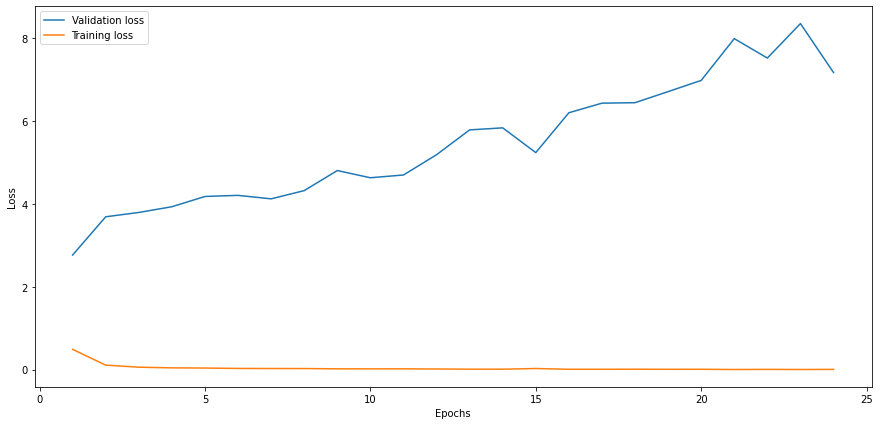

In [ ]:
# accuracy = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(15, 7))
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.plot(epochs, loss_values, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/Research/IBM Advanced Data Science/predicting_location.h5')

In [ ]:
y_hat = model.predict(X_test_f)
y_hat = (y_hat > 0.5)
y_hat

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False]])

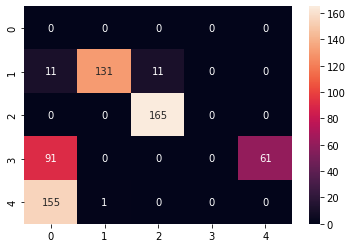

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import balanced_accuracy_score, hamming_loss
balanced_accuracy_score(y_test.argmax(axis=1), y_hat.argmax(axis=1))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.46405228758169936

In [ ]:
hamming_loss(y_test.argmax(axis=1), y_hat.argmax(axis=1))

0.5271565495207667

## Trial 2

In [ ]:
del model 

from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=100,batch_size=10,callbacks=[callback], validation_data = (X_test_f, y_test))

Epoch 1/100
266/266 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.8560 - val_loss: 5.0586 - val_accuracy: 0.0367
Epoch 2/100
266/266 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9639 - val_loss: 6.7081 - val_accuracy: 0.0304
Epoch 3/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9725 - val_loss: 7.4906 - val_accuracy: 0.0367
Epoch 4/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9767 - val_loss: 8.3907 - val_accuracy: 0.0288
Epoch 5/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9812 - val_loss: 9.3235 - val_accuracy: 0.0288
Epoch 6/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9876 - val_loss: 11.3625 - val_accuracy: 0.0208
Epoch 7/100
266/266 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9857 - val_loss: 12.0433 - val_accuracy: 0.03